# Part 2b annotation

In this notebook cells in the allntova dataset are clustered with unsupervised Leiden clustering at different resolutions. Next, appriopiate cluster resolutions are used for different cell populations (e.g. T cells) to acquire a final cell state annotation that matches classification by prior-annotated reference cell states and cell state marker genes (see part 2a). 

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import mm_functions_14_10_2020 as mm

In [2]:
# Set figure parameters 
mylines = 0.15*2.82 # the number 2.82 is the difference
					# between Illustrator 1 pt and python 1 pt.
mpl.rcParams['axes.linewidth'] = mylines # default 1
mpl.rcParams['ytick.direction'] = 'out' # default 'in'
mpl.rcParams['xtick.direction'] = 'out' # default 'in'
mpl.rcParams['xtick.major.size'] = 2 # default 4
mpl.rcParams['ytick.major.size'] = 2 # default 4
mpl.rcParams['xtick.major.width'] = mylines # default 0.5
mpl.rcParams['ytick.major.width'] = mylines # default 0.5
mpl.rcParams['grid.linewidth'] = mylines/1.5 # default 0.5
mpl.rcParams['grid.color'] = '0.8' # default 'k'
mpl.rcParams['grid.linestyle'] = 'solid'# default ':'
mpl.rcParams['legend.frameon'] = False # default True
mpl.rcParams['figure.dpi']= 300
mpl.rc("savefig", dpi=300)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

## Load adata

In [ ]:
adata = sc.read_h5ad('./backups/adata_allntova_05202020.h5ad')

## Generate cluster resolutions to use for final annotation

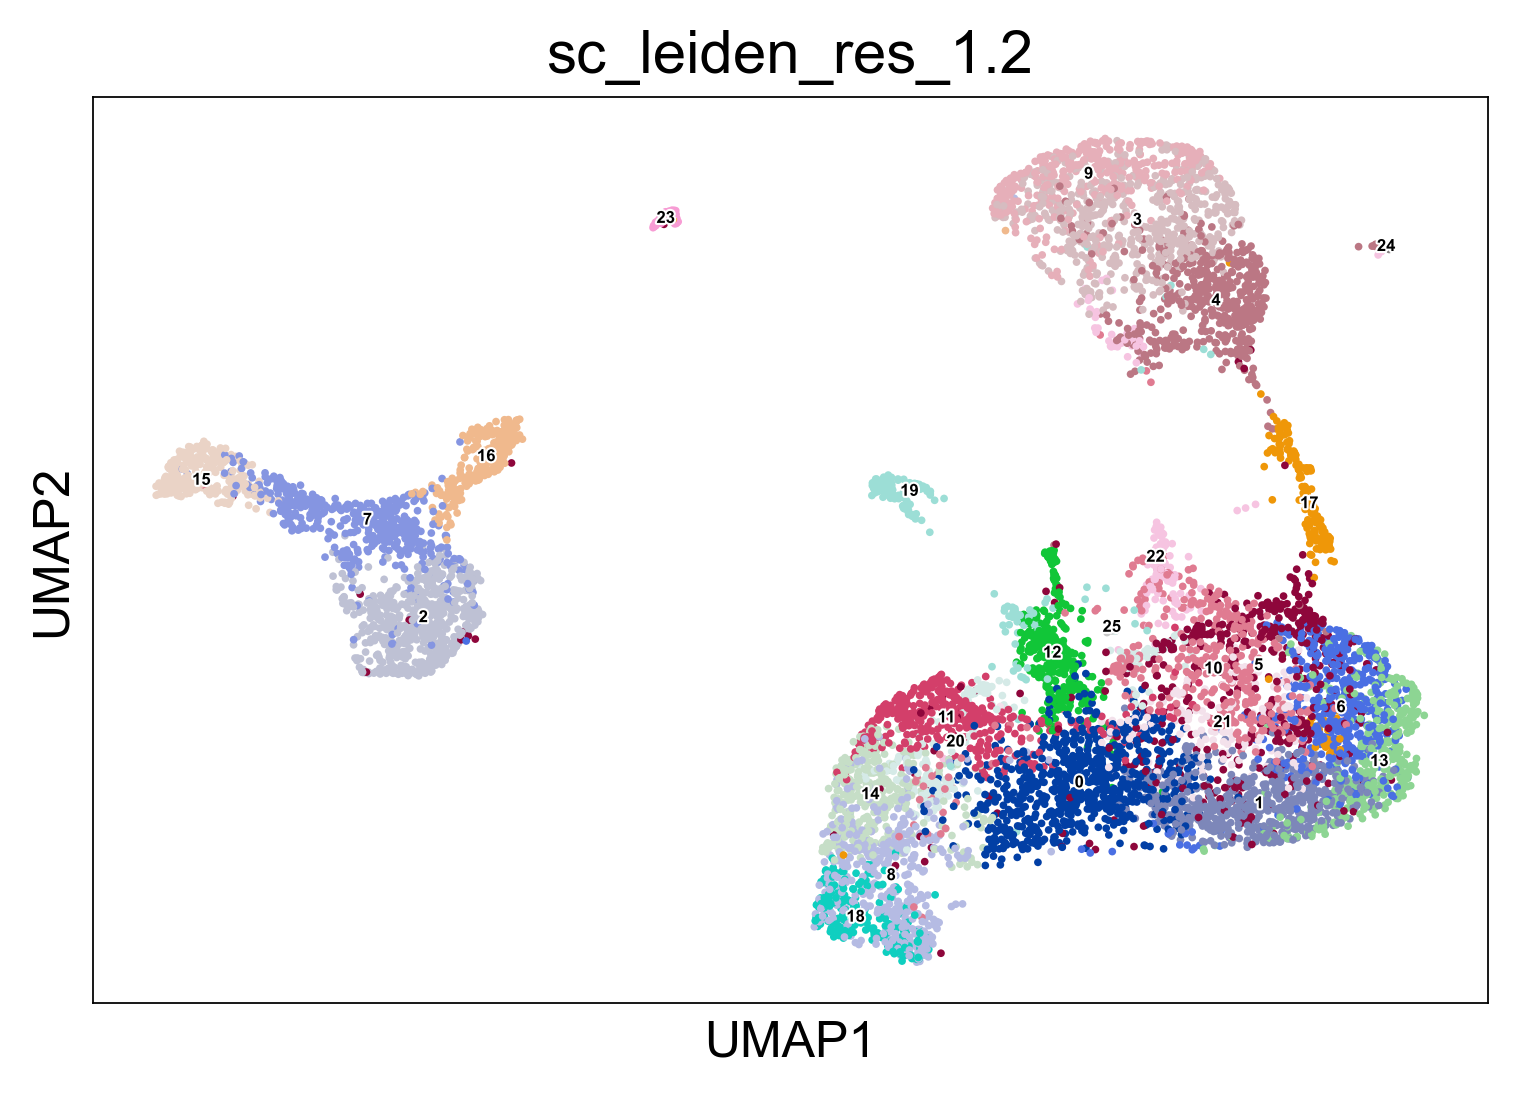

In [82]:
# Split cluster 12 in SCT_snn_res_1_8 to be able to merge for final annotation. 
sc.tl.leiden(adata, resolution = 1.2, key_added = 'sc_leiden_res_1.2')
sc.pl.umap(adata, color = 'sc_leiden_res_1.2', legend_loc = 'on data', legend_fontsize = 4, legend_fontoutline = 1)

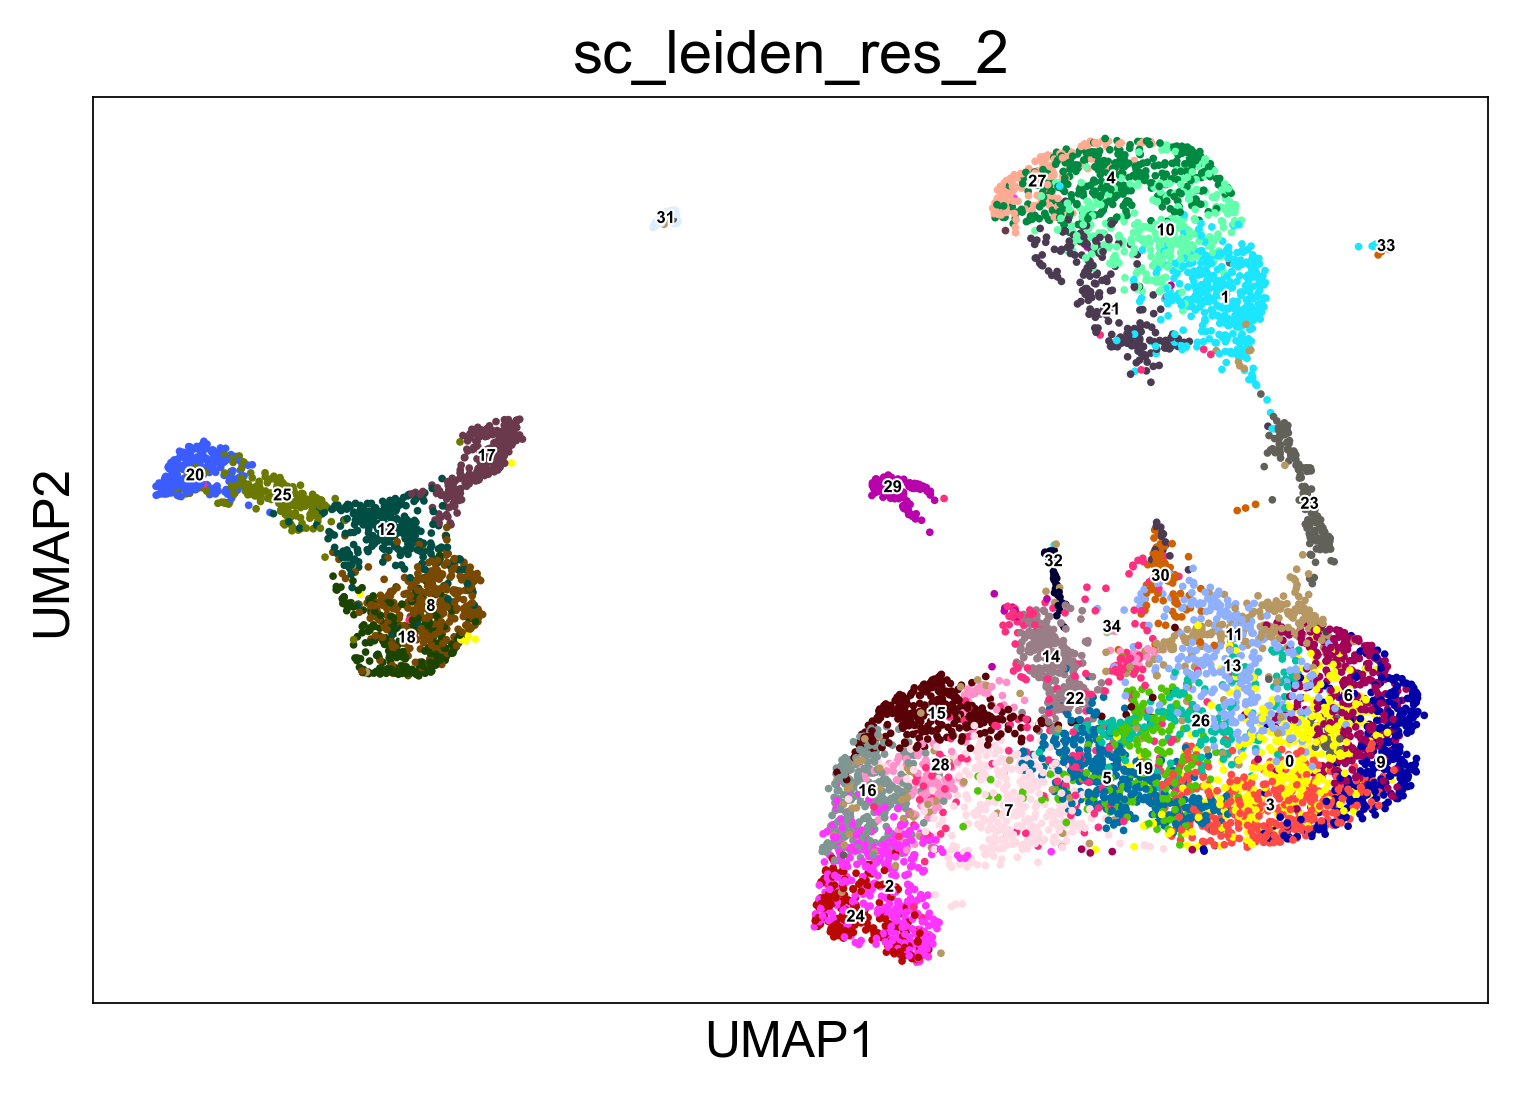

In [83]:
# Split cluster 12 in SCT_snn_res_1_8 to be able to merge for final annotation. 
sc.tl.leiden(adata, resolution = 2, key_added = 'sc_leiden_res_2')
sc.pl.umap(adata, color = 'sc_leiden_res_2', legend_loc = 'on data', legend_fontsize = 4, legend_fontoutline = 1)

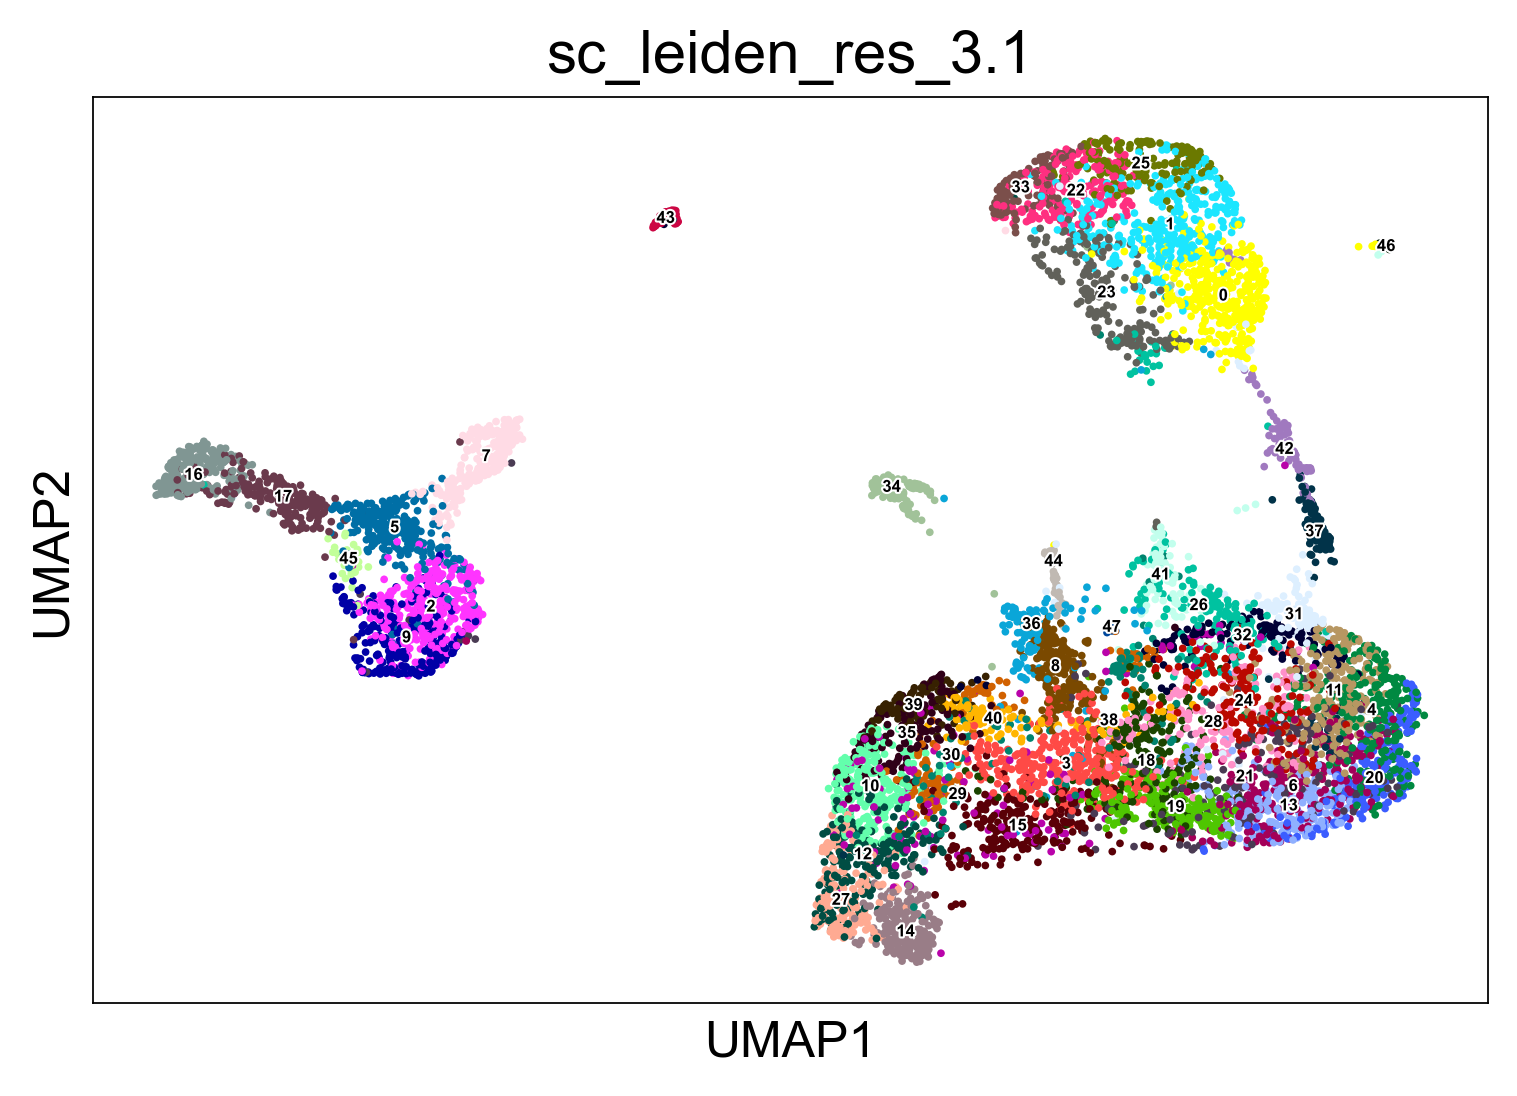

In [84]:
# Split cluster 12 in SCT_snn_res_1_8 to be able to merge for final annotation. 
sc.tl.leiden(adata, resolution = 3.1, key_added = 'sc_leiden_res_3.1')
sc.pl.umap(adata, color = 'sc_leiden_res_3.1', legend_loc = 'on data', legend_fontsize = 4, legend_fontoutline = 1)

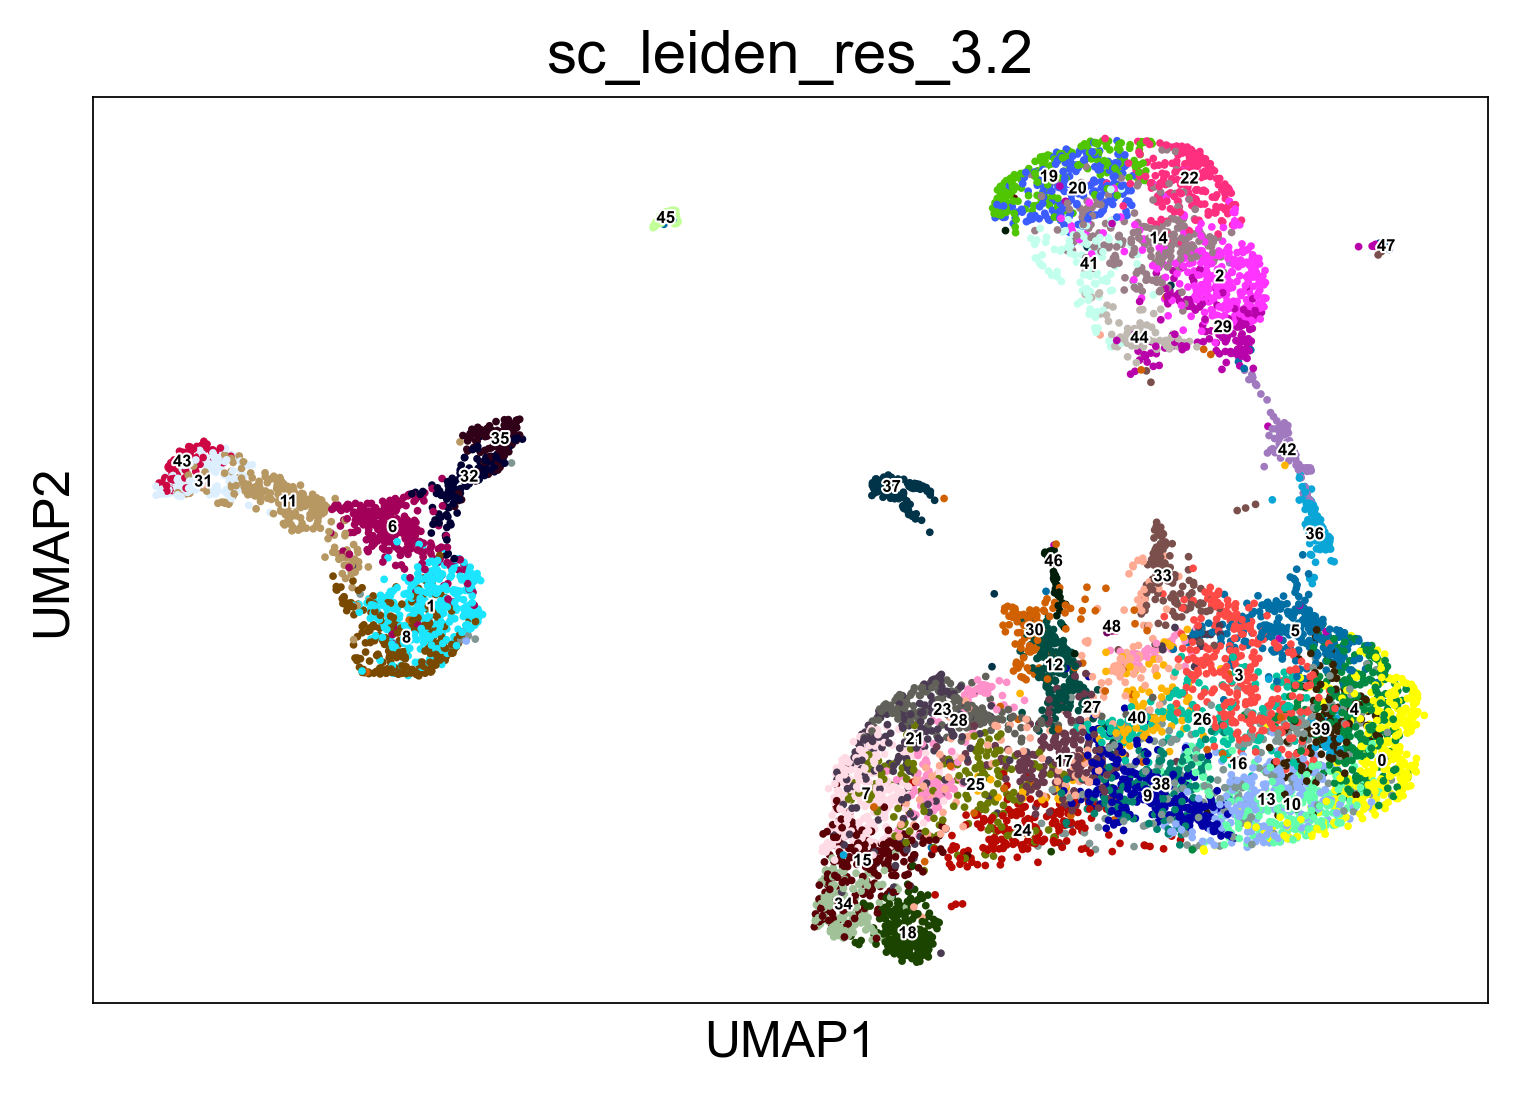

In [85]:
sc.tl.leiden(adata, resolution = 3.2, key_added = 'sc_leiden_res_3.2')
sc.pl.umap(adata, color = 'sc_leiden_res_3.2', legend_loc = 'on data', legend_fontsize = 4, legend_fontoutline = 1)

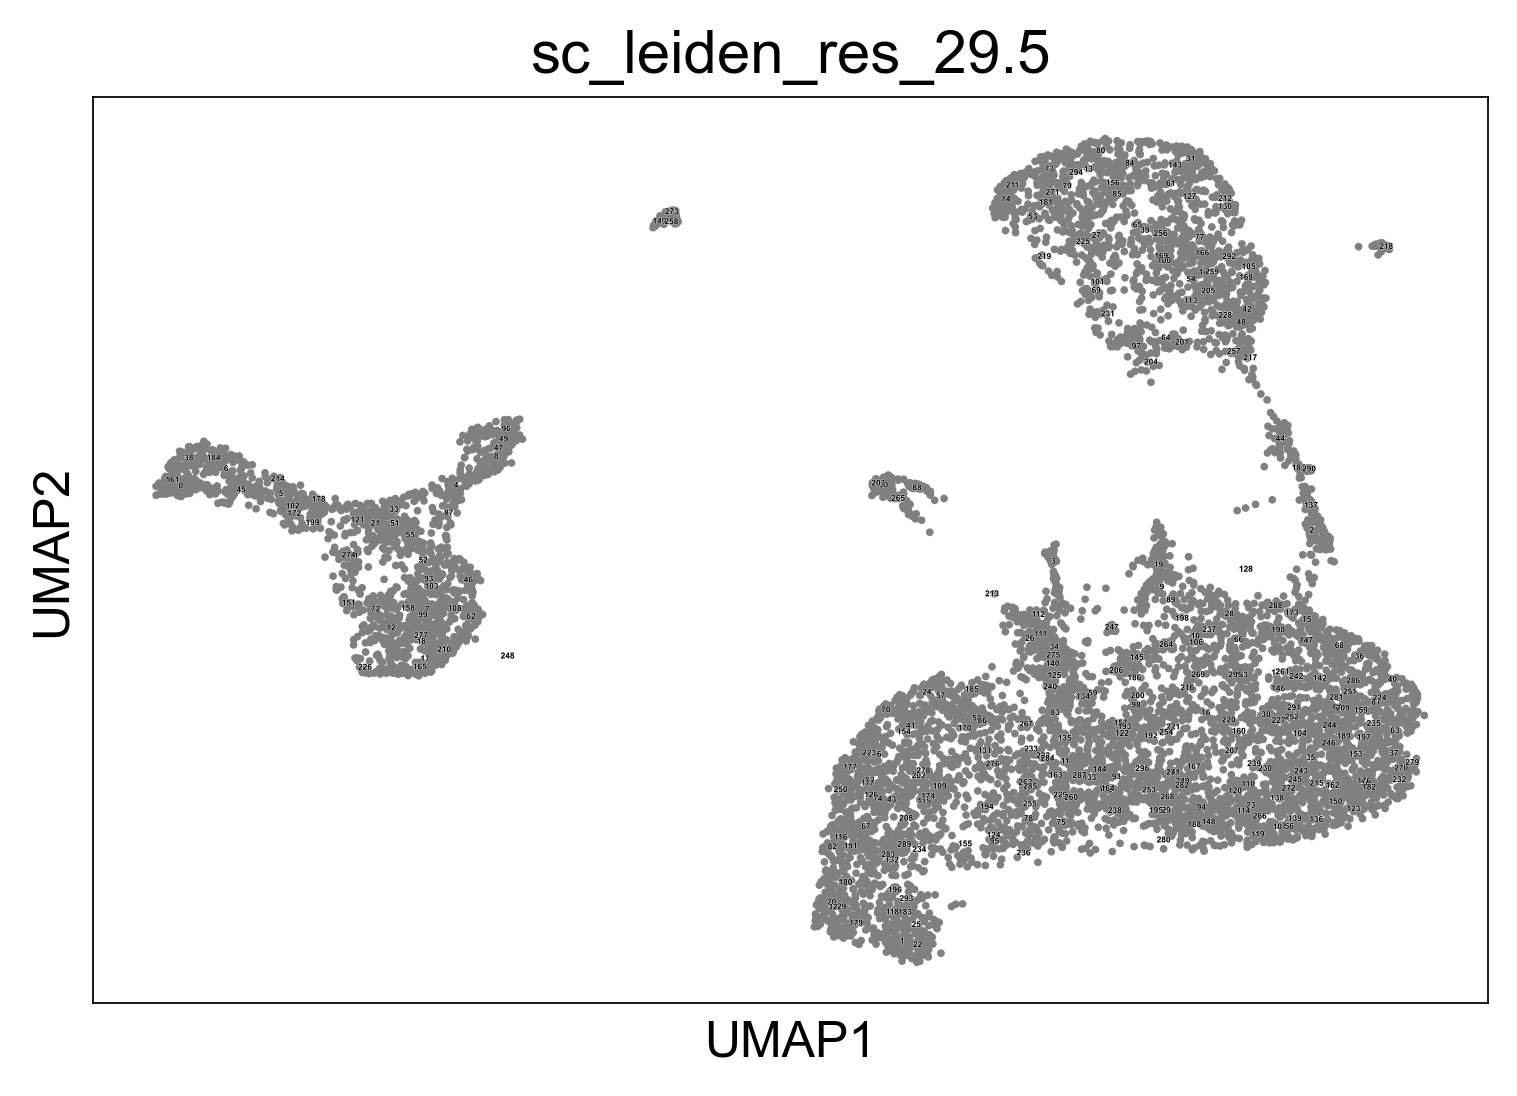

In [86]:
# Split cluster 21 in SCT_snn_res_1_8 to be able to merge for final annotation. 
sc.tl.leiden(adata, resolution = 29.5, key_added = 'sc_leiden_res_29.5')
sc.pl.umap(adata, color = 'sc_leiden_res_29.5', legend_loc = 'on data', legend_fontsize = 2, legend_fontoutline = 0.2)

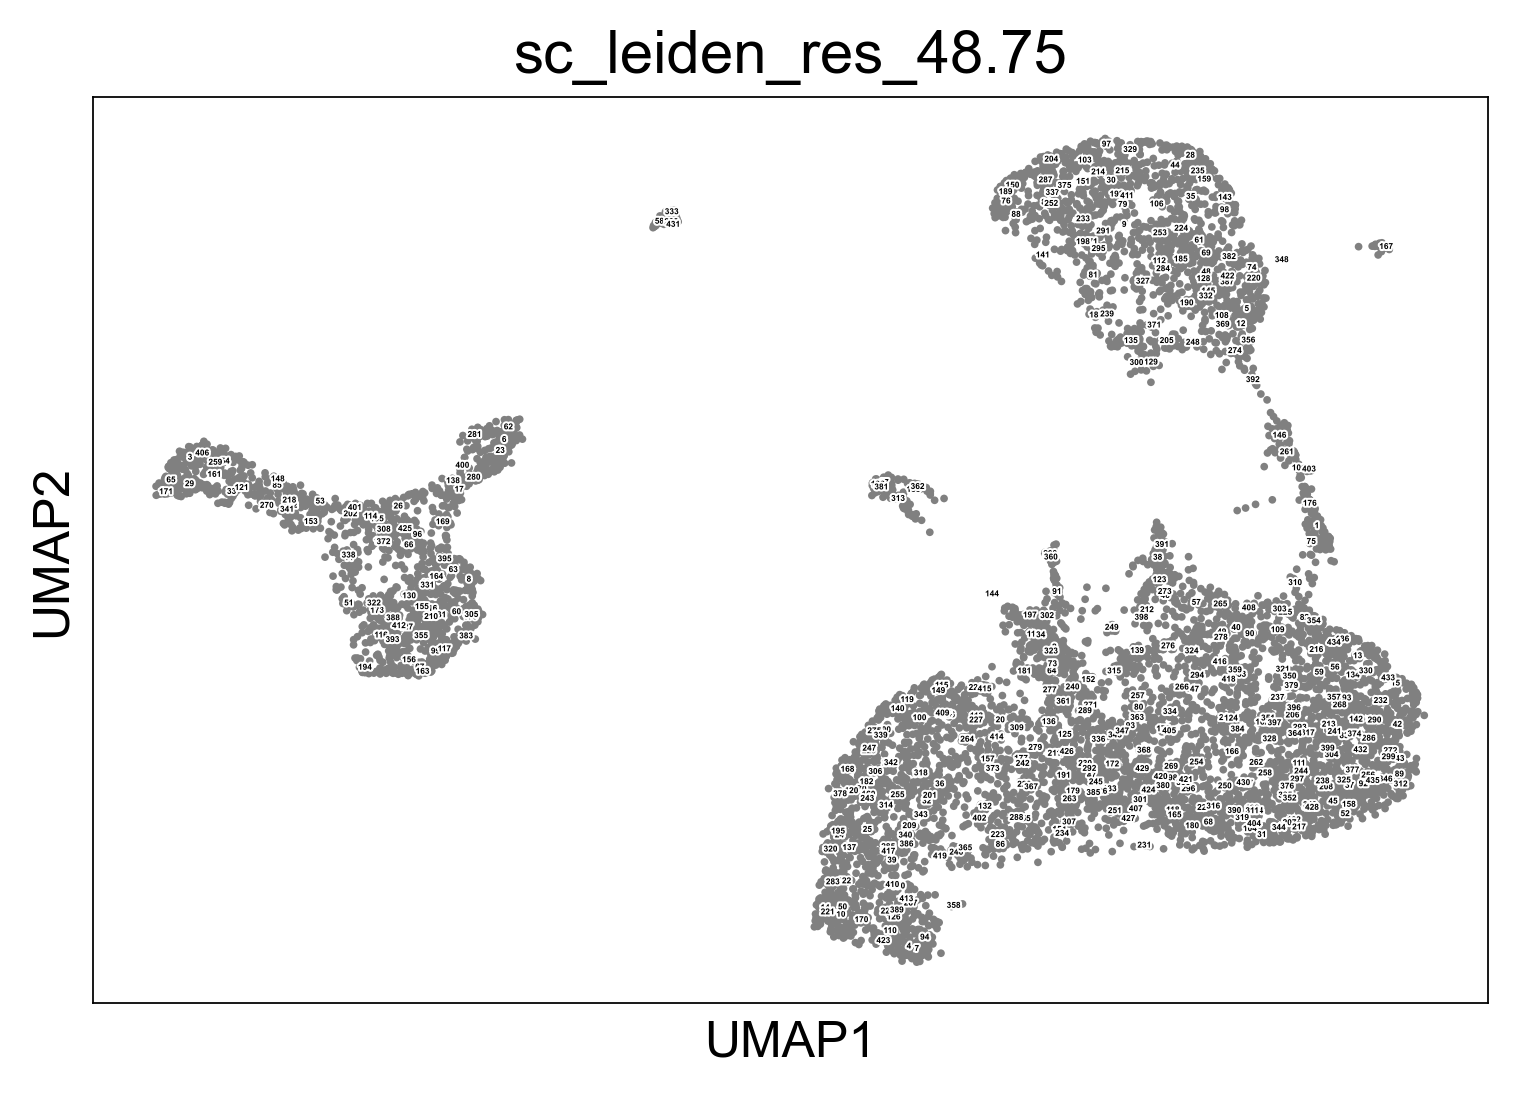

In [87]:
sc.pl.umap(adata, color = 'sc_leiden_res_48.75', legend_loc = 'on data', legend_fontsize = 2, legend_fontoutline = 1)

In [88]:
res_1_2 = {
'0':'Mono1',
'1' : 'Mac1',
'2' : 'CD8 T E',
'3': 'Non-immune',
'4' : 'Non-immune',
'5' : 'Mac1',
'6' : 'Mac1',
'7' : 'CD8 T M',
'8' : 'Mono1',
'9' : 'Non-immune', 
'10' : 'Mac1',
'11' : 'Mono1',
'12' : 'cDC2',
'13' : 'Mac1',
'14' : 'Mono1',
'15' : 'NK', 
'16' : 'CD4 T R/H', 
'17' : 'Mac2',
'18' : 'Mono1', 
'19' : 'pDC',
'20' : 'Mono1',
'21' : 'Mac1',
'22' : 'Mac1',
'23' : 'Mast cells',
'24' : 'Non-immune', 
'25' : 'Neu'
}
    
res_3_1 = {
'44': 'DC3',
'36': 'cDC1',
'8': 'cDC2', 
'42': 'Non-immune',
'16': 'NK', 
'17': 'NK'}

res_3_2 = {
'29':'Non-immune',
'36':'Mac2', 
'34':'Mono1', 
'18':'Mono2'
}   

res_29_5 = {
'88': 'B cells',
'111': 'cDC1', 
'34': 'cDC1', 
'213': 'Mono4', 
'218': 'Non-immune'}

res_48_75 = {
'181': 'Mono4'
}

## Generate final annotation column

In [89]:
series_res_1_2 = adata.obs['sc_leiden_res_1.2'].map(res_1_2)
series_res_3_1 = adata.obs['sc_leiden_res_3.1'].map(res_3_1)
series_res_3_2 = adata.obs['sc_leiden_res_3.2'].map(res_3_2)
series_res_29_5 = adata.obs['sc_leiden_res_29.5'].map(res_29_5)
series_res_48_75 = adata.obs['sc_leiden_res_48.75'].map(res_48_75)

In [90]:
series_res_1_2.update(series_res_3_1)
series_res_1_2.update(series_res_3_2)
series_res_1_2.update(series_res_29_5)
series_res_1_2.update(series_res_48_75)
series_res_1_2

ATTAGACG_GGTTACAC-TTGTGACT_2    Non-immune
ATTAGACG_CACTAACC-GCAAGGAC_2    Non-immune
ATTAGACG_GTGCCCAT-AGGTTGTG_2    Non-immune
ATTAGACG_TAGCGGAT-AGAAGTTA_2    Non-immune
ATTAGACG_GTGGTGCT-AATTCCCA_2    Non-immune
                                   ...    
CTCCTTAC_AGCATGCC-TCTCAACC_2       B cells
CTCCTTAC_AAGGATGA-GGGAGGTA_2       CD8 T M
CTCCTTAC_AATGTATG-GCTTTGGC_2          cDC1
CTCCTTAC_ACCAAGGG-GTTGCACG_2          Mac1
CTCCTTAC_ACCCGATT-GAATTCGT_2          Mac1
Name: sc_leiden_res_1.2, Length: 8757, dtype: object

In [91]:
print(series_res_1_2.isna().any())
print(series_res_1_2.unique())

False
['Non-immune' 'Mono1' 'CD8 T E' 'CD4 T R/H' 'Mac1' 'cDC2' 'Mac2' 'cDC1'
 'DC3' 'NK' 'Mono4' 'Mono2' 'CD8 T M' 'pDC' 'Neu' 'B cells' 'Mast cells']


In [92]:
series_res_1_2 = series_res_1_2.to_frame()
series_res_1_2.columns = ['State']
series_res_1_2

,State
ATTAGACG_GGTTACAC-TTGTGACT_2,Non-immune
ATTAGACG_CACTAACC-GCAAGGAC_2,Non-immune
ATTAGACG_GTGCCCAT-AGGTTGTG_2,Non-immune
ATTAGACG_TAGCGGAT-AGAAGTTA_2,Non-immune
ATTAGACG_GTGGTGCT-AATTCCCA_2,Non-immune
...,...
CTCCTTAC_AGCATGCC-TCTCAACC_2,B cells
CTCCTTAC_AAGGATGA-GGGAGGTA_2,CD8 T M
CTCCTTAC_AATGTATG-GCTTTGGC_2,cDC1
CTCCTTAC_ACCAAGGG-GTTGCACG_2,Mac1


In [93]:
adata.obs = adata.obs.join(series_res_1_2)

In [95]:
adata.uns['State_colors'] = [
# B cells    
 '#0F34A1',
# CD4+ T Reg/Conv
 '#B1FCA3',
# CD8+ T Eff/Exh
 '#5CC99C',
# CD8+ T Mem    
 '#C2BD65',
# DC3    
 '#8D1A11',
# Mac1   
 '#f7b6d2',
# Mac2
 '#70869E',
# Mast cells 
 '#571731',
# Mono1 
 '#E0E667',
# Mono2
  '#6C7126', 
# MonoDC
 '#00cc00',
# NK
 '#1E5A2C',
# Neu 
 '#1A95F4',
# Non-immune
 '#D3D3D3',
# cDC1
 '#E93324',
# cDC2
 '#F09D38',
# pDC 
 '#9D95F7']

## Fig. 1A 

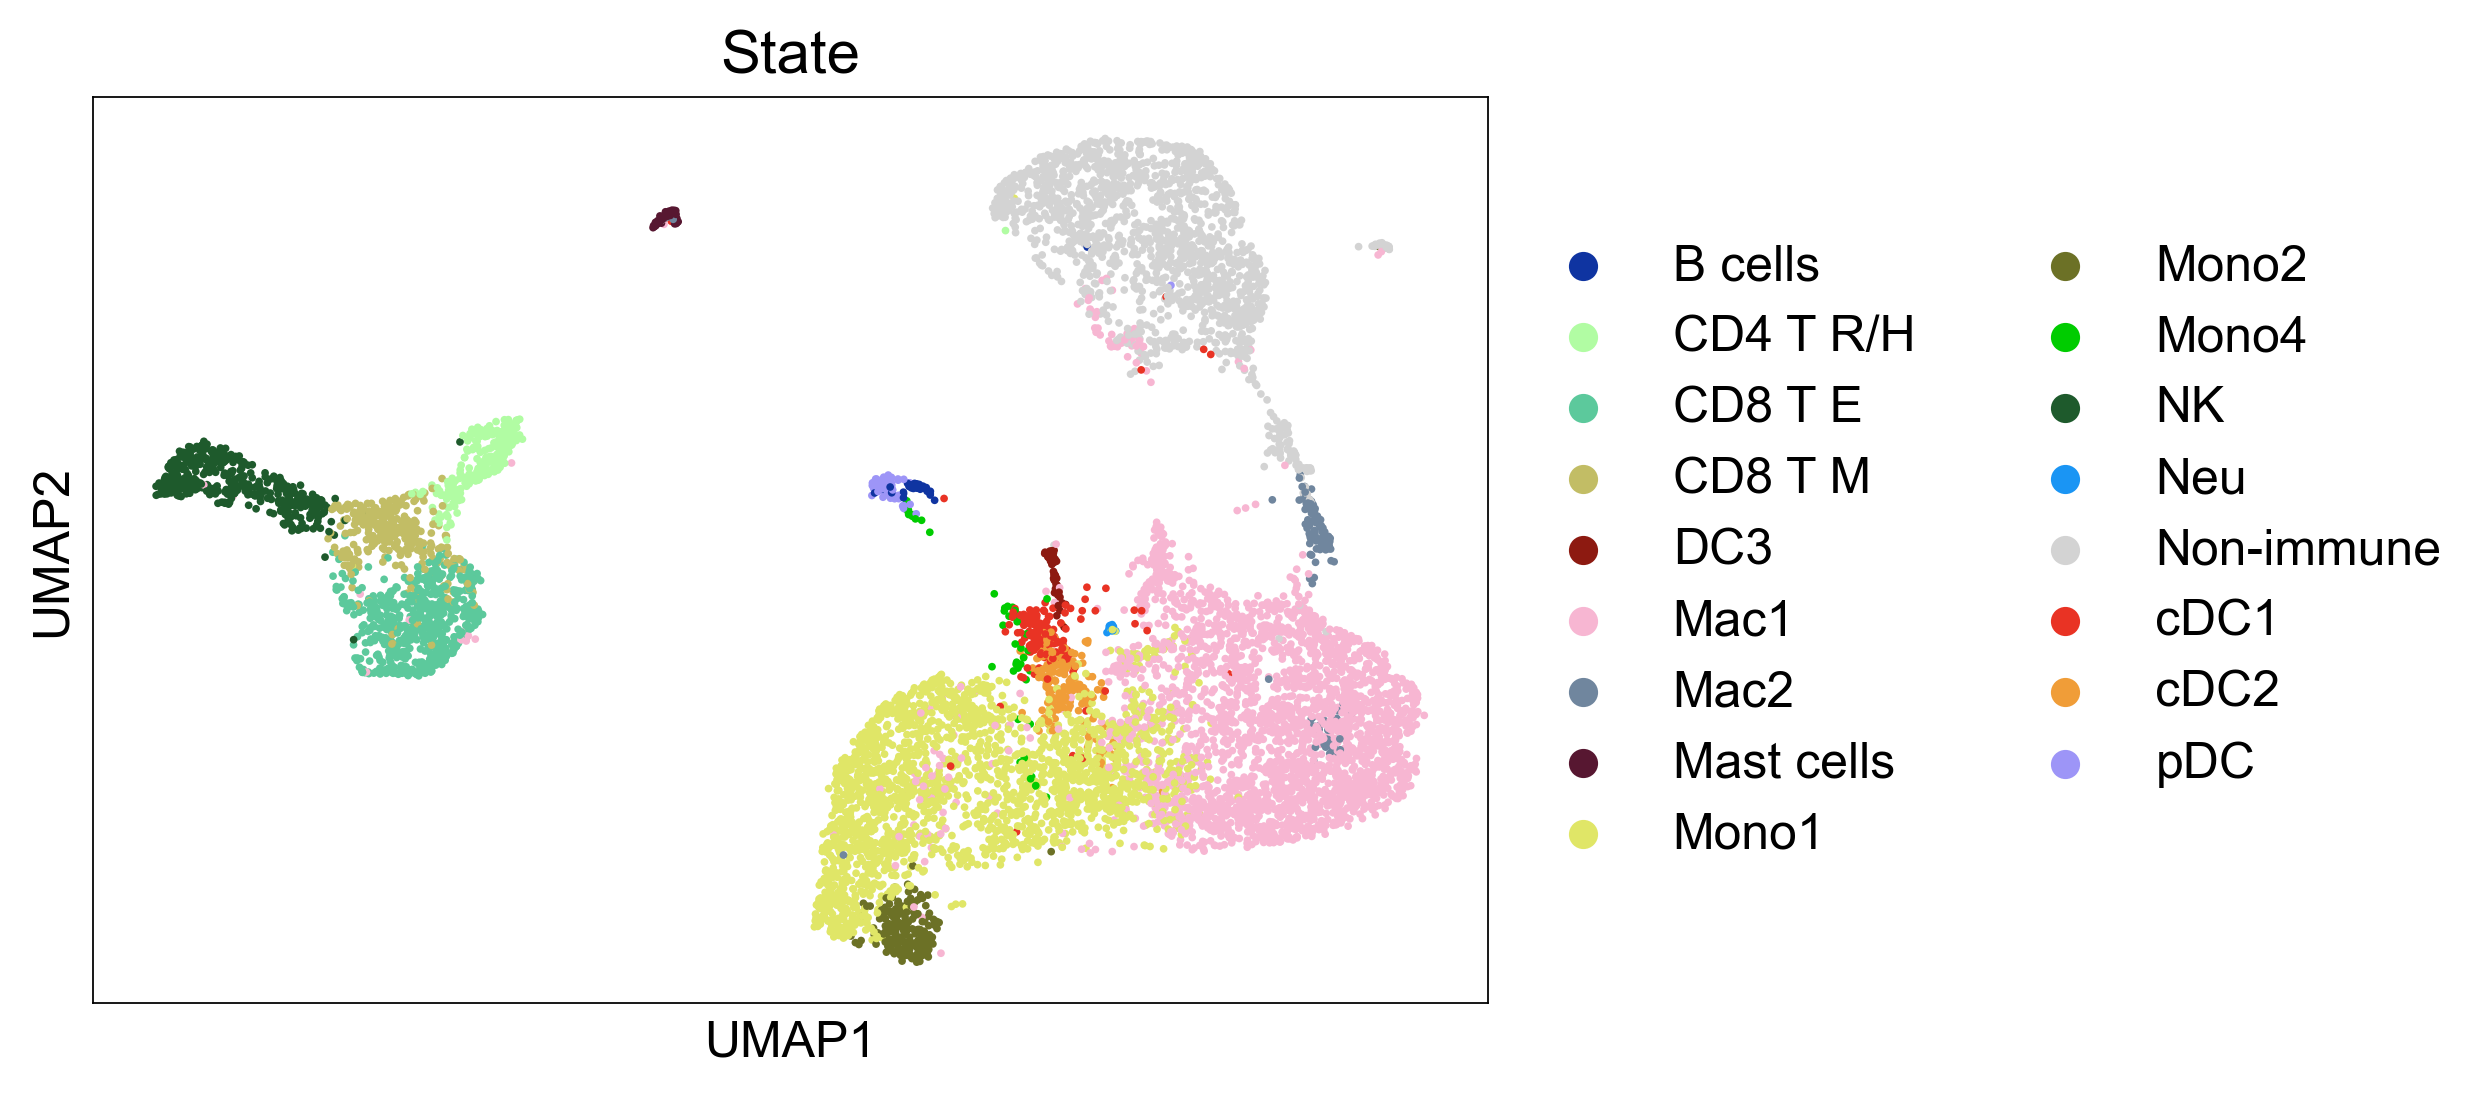

In [96]:
# Mono4 was changed manually into MonoDC 
fig = sc.pl.umap(adata, color = 'State', return_fig = True)
fig.savefig('./outputs/final_umap_f_mm.pdf', bbox_inches='tight')

In [97]:
# How many cells in each cluster/state: 
adata.obs['State'].value_counts()

Mac1          2609
Mono1         2050
Non-immune    1531
CD8 T E        585
NK             422
CD8 T M        314
CD4 T R/H      264
Mono2          207
cDC2           189
cDC1           174
Mac2           125
pDC             76
Mast cells      59
DC3             54
Mono4           44
B cells         35
Neu             19
Name: State, dtype: int64

## Cleanup allntova adata 

In [98]:
adata.obs.drop(['ClusterID', 'ClusterName', 'SCT_snn_res_0_2', 'SCT_snn_res_0_4',
                            'SCT_snn_res_0_6', 'SCT_snn_res_0_8', 'SCT_snn_res_1',
                            'SCT_snn_res_1_2', 'SCT_snn_res_1_4', 'SCT_snn_res_1_6',
                            'SCT_snn_res_1_8', 'seurat_clusters', 'sc_leiden_res_2',
                            'sc_leiden_res_3.1', 'sc_leiden_res_3.2', 'sc_leiden_res_29.5', 'sc_leiden_res_1.2'], inplace = True, axis = 1)

In [99]:
adata['allntova']

AnnData object with n_obs × n_vars = 8757 × 20679 
    obs: 'SeqRun', 'expClass', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'novelty', 'orig_ident', 'percent_mt', 'sc_leiden_res_48.75', 'State'
    var: 'Selected', 'sct_detection_rate', 'sct_gmean', 'sct_residual_mean', 'sct_residual_variance', 'sct_variable', 'sct_variance'
    uns: 'leiden', 'neighbors', 'sc_leiden_res_1.2_colors', 'sc_leiden_res_2_colors', 'sc_leiden_res_3.1_colors', 'sc_leiden_res_3.2_colors', 'sc_leiden_res_29.5_colors', 'sc_leiden_res_48.75_colors', 'State_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'pca_feature_loadings'
    layers: 'norm_data', 'scale_data'
    obsp: 'connectivities', 'distances'

In [100]:
del adata['allntova'].uns['sc_leiden_res_2_colors']
del adata['allntova'].uns['sc_leiden_res_3.1_colors']
del adata['allntova'].uns['sc_leiden_res_3.2_colors']
del adata['allntova'].uns['sc_leiden_res_29.5_colors']
del adata['allntova'].uns['sc_leiden_res_1.2_colors']

In [101]:
adata['allntova']

AnnData object with n_obs × n_vars = 8757 × 20679 
    obs: 'SeqRun', 'expClass', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'novelty', 'orig_ident', 'percent_mt', 'sc_leiden_res_48.75', 'State'
    var: 'Selected', 'sct_detection_rate', 'sct_gmean', 'sct_residual_mean', 'sct_residual_variance', 'sct_variable', 'sct_variance'
    uns: 'leiden', 'neighbors', 'sc_leiden_res_48.75_colors', 'State_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'pca_feature_loadings'
    layers: 'norm_data', 'scale_data'
    obsp: 'connectivities', 'distances'

In [102]:
adata['allntova'].obs.rename(columns={'expClass': 'Biological replicate'}, inplace = True)

In [104]:
adata['allntova'].obs

,SeqRun,Biological replicate,nCount_RNA,nCount_SCT,nFeature_RNA,nFeature_SCT,novelty,orig_ident,percent_mt,sc_leiden_res_48.75,State
ATTAGACG_GGTTACAC-TTGTGACT_2,Run2,CTRL_2immgen,5668.0,1166.0,2515,903,0.905981,sample2_10,3.952011,5,Non-immune
ATTAGACG_CACTAACC-GCAAGGAC_2,Run2,CTRL_2immgen,5733.0,1135.0,2590,824,0.908183,sample2_10,5.372406,112,Non-immune
ATTAGACG_GTGCCCAT-AGGTTGTG_2,Run2,CTRL_2immgen,5214.0,1135.0,2216,744,0.900031,sample2_10,7.940161,215,Non-immune
ATTAGACG_TAGCGGAT-AGAAGTTA_2,Run2,CTRL_2immgen,4673.0,1067.0,2239,777,0.912922,sample2_10,2.803338,84,Non-immune
ATTAGACG_GTGGTGCT-AATTCCCA_2,Run2,CTRL_2immgen,4289.0,1011.0,2120,742,0.915752,sample2_10,3.497319,224,Non-immune
...,...,...,...,...,...,...,...,...,...,...,...
CTCCTTAC_AGCATGCC-TCTCAACC_2,Run2,CTRL_1immgen,356.0,753.0,276,300,0.956675,sample2_8,1.966292,188,B cells
CTCCTTAC_AAGGATGA-GGGAGGTA_2,Run2,CTRL_1immgen,438.0,840.0,328,333,0.952451,sample2_8,3.881279,96,CD8 T M
CTCCTTAC_AATGTATG-GCTTTGGC_2,Run2,CTRL_1immgen,354.0,750.0,290,310,0.966024,sample2_8,2.542373,398,cDC1
CTCCTTAC_ACCAAGGG-GTTGCACG_2,Run2,CTRL_1immgen,379.0,780.0,278,294,0.947804,sample2_8,4.749341,379,Mac1


In [103]:
# write adata 
adata['allntova'].write('./backups/adata_' + 'allntova'+ '_05302020.h5ad')